# DSC 530 Final Project
## Thanh Nguyen-Duong
## Bellevue University
## 02/22/2020

In [42]:
import thinkstats2
import thinkplot
import pandas_profiling
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set(style="white")

bad_drivers = pd.read_csv('bad-drivers.csv')

bad_drivers2 = bad_drivers[['State', 'Number of drivers involved in fatal collisions per billion miles', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding',
         'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired', 'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted',
                           'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents']]


bad_drivers2.rename(columns={'State': 'State', 'Number of drivers involved in fatal collisions per billion miles': 'Fatal_BillionMiles',
                       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding': 'Fatal_Speeding', 
                       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired' : 'Fatal_AlcoholImpaired',
                       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted' : 'Fatal_NotDistracted', 
                       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents': 'Fatal_NoPrevAccidents'}, inplace = True)

bad_drivers2.head()

C:\Users\Tommy\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,State,Fatal_BillionMiles,Fatal_Speeding,Fatal_AlcoholImpaired,Fatal_NotDistracted,Fatal_NoPrevAccidents
0,Alabama,18.8,39,30,96,80
1,Alaska,18.1,41,25,90,94
2,Arizona,18.6,35,28,84,96
3,Arkansas,22.4,18,26,94,95
4,California,12.0,35,28,91,89


# Data Profiling

In [43]:
# Create a data profile to plan data cleaning

pandas_profiling.ProfileReport(bad_drivers2)


C:\Users\Tommy\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,6
Number of observations,51
Total Missing (%),0.0%
Total size in memory,2.5 KiB
Average record size in memory,50.5 B
Numeric,5
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,0


# Data Cleaning 

Remove irrelevant, missing and duplicated data from data frame

In [44]:
df = bad_drivers2.drop_duplicates().copy()
df["State"].dropna(how='any', inplace=True)

df["Fatal_BillionMiles"].dropna(how='any', inplace=True)

df["Fatal_Speeding"].dropna(how='any', inplace=True)

df["Fatal_AlcoholImpaired"].dropna(how='any', inplace=True)

df["Fatal_NotDistracted"].dropna(how='any', inplace=True)

df["Fatal_NoPrevAccidents"].dropna(how='any', inplace=True)


Find the interquartile range for State based on Fatal_Speeding percentage

In [45]:
# mean
df2 = df.groupby("State")["Fatal_Speeding"]
_median = df2.mean()
_median

# 75th percentile of the prices of all the vehicles types
_quantile75 = df2.quantile(0.75)

# 25th percentile of the prices of all the vehicles types
_quantile25 = df2.quantile(0.25)

# Calculating the value of the prices of each vehicle type above which all the values are outliers
iqr = (_quantile75 - _quantile25)*1.5 + _median
iqr

State
Alabama                 39.0
Alaska                  41.0
Arizona                 35.0
Arkansas                18.0
California              35.0
Colorado                37.0
Connecticut             46.0
Delaware                38.0
District of Columbia    34.0
Florida                 21.0
Georgia                 19.0
Hawaii                  54.0
Idaho                   36.0
Illinois                36.0
Indiana                 25.0
Iowa                    17.0
Kansas                  27.0
Kentucky                19.0
Louisiana               35.0
Maine                   38.0
Maryland                34.0
Massachusetts           23.0
Michigan                24.0
Minnesota               23.0
Mississippi             15.0
Missouri                43.0
Montana                 39.0
Nebraska                13.0
Nevada                  37.0
New Hampshire           35.0
New Jersey              16.0
New Mexico              19.0
New York                32.0
North Carolina          39.0
North Da

Correlation of all chosen variables

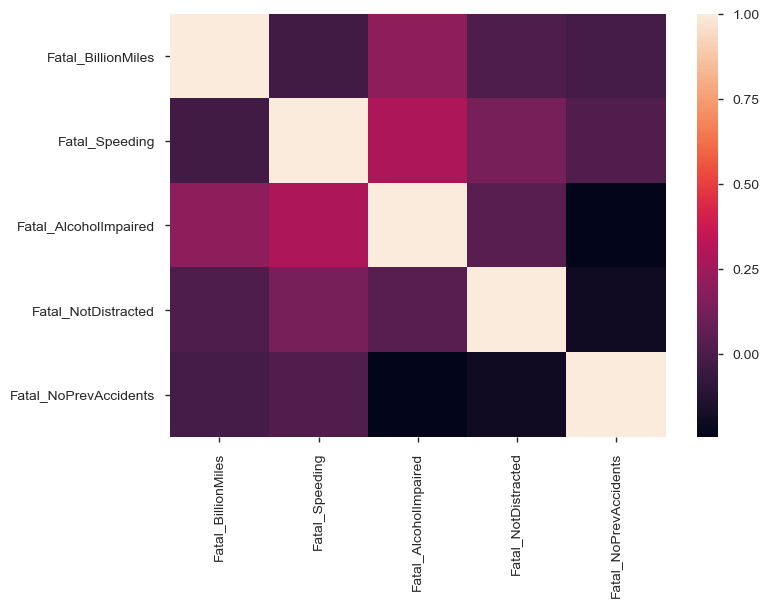

In [46]:
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)



# Exploratory Data Analysis

### 1. Histograms


### Collision Deaths Per Billion Miles (Fatal_BillionMiles)

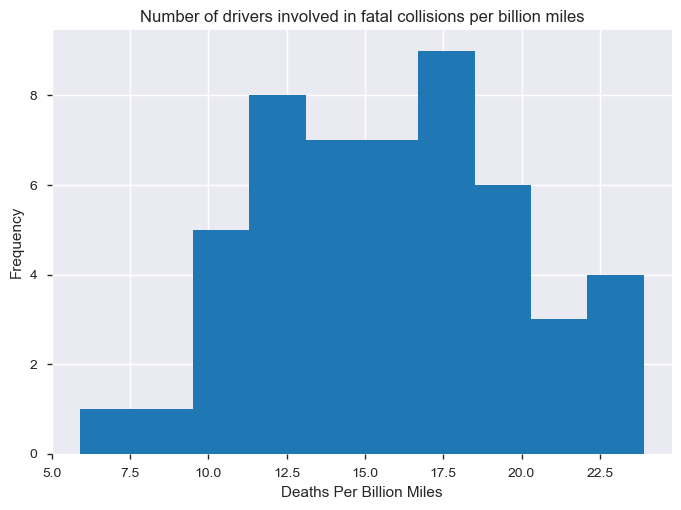

In [47]:
plt.hist(df.Fatal_BillionMiles)
plt.xlabel('Deaths Per Billion Miles')
plt.ylabel('Frequency')
plt.title('Number of drivers involved in fatal collisions per billion miles')
plt.show()

# This histogram seems to be a symmetrical distribution

For every billion miles, the most numbers of drivers involved in fatal collisions will be at around 17.5, while on the lower end, it will be 7.5

### Percentage of Drivers Involved in Fatal Collisions Who Had not Been Involved in Any Previous Accidents (Fatal_NoPrevAccidents)

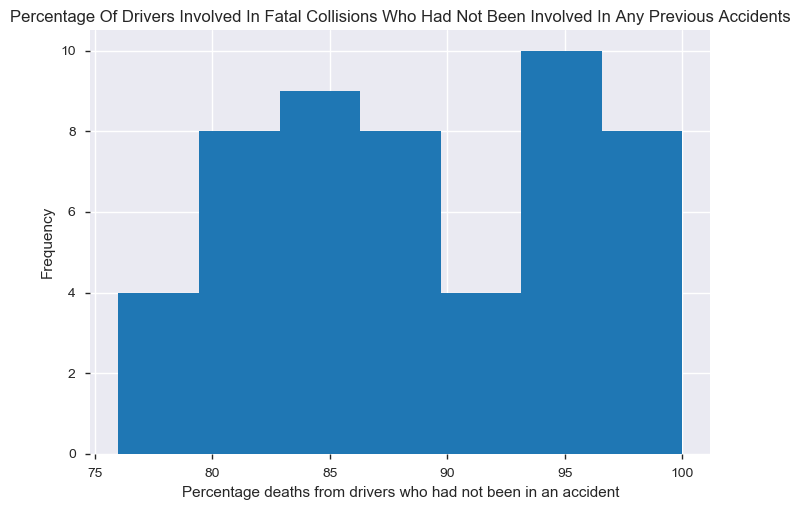

In [48]:
plt.hist(df.Fatal_NoPrevAccidents, bins = 'auto')
plt.xlabel('Percentage deaths from drivers who had not been in an accident')
plt.ylabel('Frequency')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents')
plt.show()

# Histogram appears to be left-skewed with tail learning left 

The histogram appears to be left-skewed, and almost 95% of deaths come from drivers who had not been in an accident

### Percentage of Drivers Involved In Fatal Collisions Who Were Not Distracted
### (Fatal_NotDistracted)

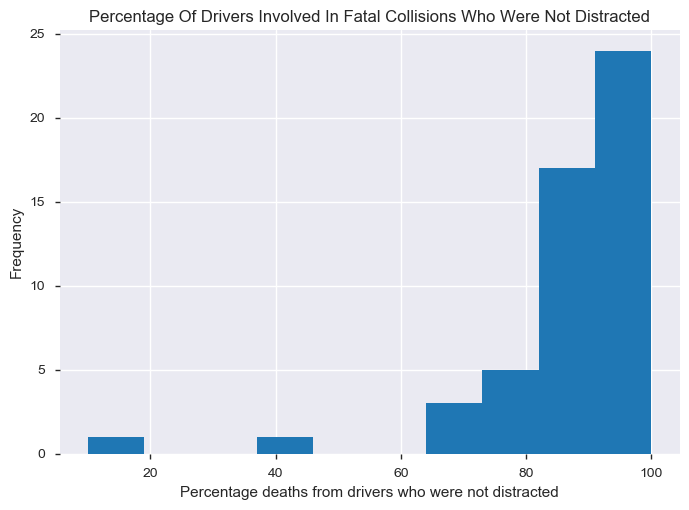

In [49]:
plt.hist(df.Fatal_NotDistracted)
plt.xlabel('Percentage deaths from drivers who were not distracted')
plt.ylabel('Frequency')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted')
plt.show()

# This is a left-skewed histogram, with tail leaning towards the left 

For this variable, the percentage of deaths from drivers who were not distracted were approximately in the 90-100% which is surprising.

### Percentage of Drivers Involved in Fatal Collisions Who Were Speeding (Fatal_Speeding)

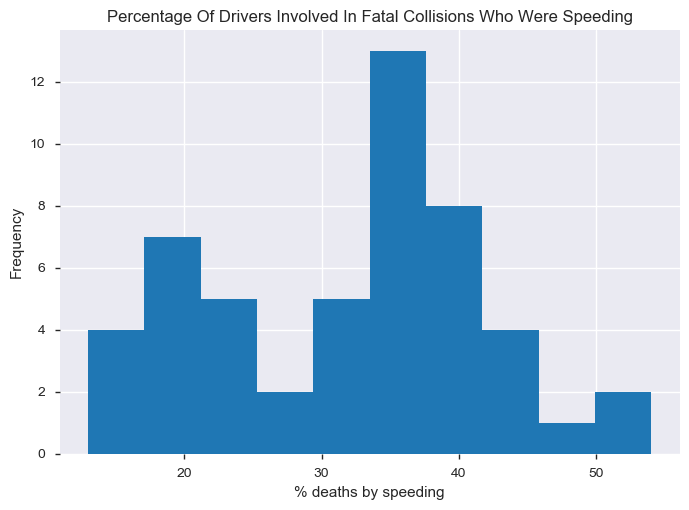

In [50]:
plt.hist(df.Fatal_Speeding)
plt.xlabel('% deaths by speeding')
plt.ylabel('Frequency')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding')
plt.show()

The percentage of deaths by speeding were around 38% with the histogram shows an almost symmetrical distribution. 

### Percentage of Drivers Involved in Fatal Collisions Who Were Alcohol-Impaired (Fatal_AlcoholImpaired)

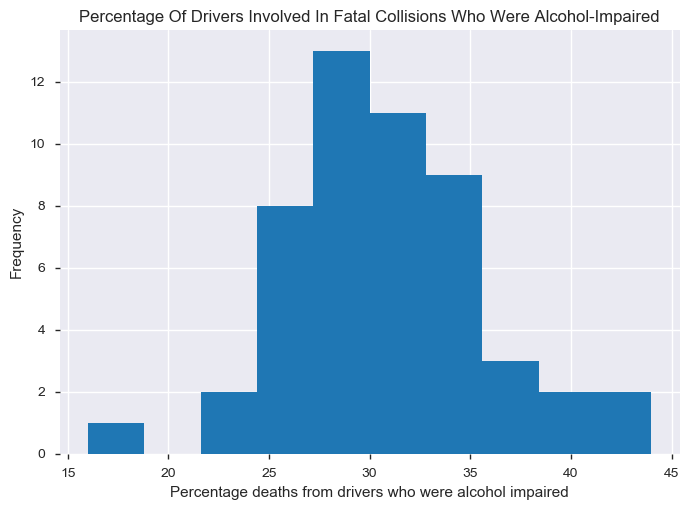

In [51]:
plt.hist(df.Fatal_AlcoholImpaired)
plt.xlabel('Percentage deaths from drivers who were alcohol impaired')
plt.ylabel('Frequency')
plt.title('Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired')
plt.show()

# This histogram is also a symmetrical distribution on both sides.

The percentage of deaths from drivers who were alcohol impaired is about 28-30%

## 2. Descriptive Characteristics

### Mean, Mode and Spread for df.Fatal_BillionMiles 


In [52]:
# Number of drivers involved in fatal collisions per billion miles

print("Mean =", df["Fatal_BillionMiles"].mean())
print("")
print("Mode =\n ", df["Fatal_BillionMiles"].mode())
print("")
print("Spread =", df["Fatal_BillionMiles"].var())


Mean = 15.79019607843137

Mode =
  0    12.8
1    13.6
2    14.1
3    19.4
4    21.4
5    23.9
dtype: float64

Spread = 16.990901960784313


### Mean, Mode and Spread for df.Fatal_NoPrevAccidents

In [53]:
# Percentage of Drivers Involved in Fatal Collisions Who Had not Been Involved in Any Previous Accidents


print("Mean =", df["Fatal_NoPrevAccidents"].mean())
print("")
print("Mode =\n", df["Fatal_NoPrevAccidents"].mode())
print("")
print("Spread =", df["Fatal_NoPrevAccidents"].var())

Mean = 88.72549019607843

Mode =
 0    87
1    95
dtype: int64

Spread = 48.44313725490194


### Mean, Mode and Spread for df.Fatal_NotDistracted

In [54]:
# Percentage of Drivers Involved in Fatal Collisions Who Were Not Distracted


print("Mean =", df["Fatal_NotDistracted"].mean())
print("")
print("Mode =", df["Fatal_NotDistracted"].mode())
print("")
print("Spread =", df["Fatal_NotDistracted"].var())

Mean = 85.92156862745098

Mode = 0    87
dtype: int64

Spread = 229.79372549019612


### Mean, Mode and Spread for df.Fatal_Speeding

In [55]:
# Percentage of Drivers Involved in Fatal Collisions Who Were Speeding


print("Mean =", df["Fatal_Speeding"].mean())
print("")
print("Mode =\n",df["Fatal_Speeding"].mode())
print("")
print("Spread =", df["Fatal_Speeding"].var())

Mean = 31.725490196078432

Mode =
 0    19
1    34
2    35
dtype: int64

Spread = 92.80313725490194


### Mean, Mode and Spread for df.AlcoholImpaired

In [56]:
# Percentage of Drivers Involved in Fatal Collisions Who Were Impaired with Alcohols


print("Mean =", df["Fatal_AlcoholImpaired"].mean())
print("")
print("Mode =",df["Fatal_AlcoholImpaired"].mode())
print("")
print("Spread =", df["Fatal_AlcoholImpaired"].var())

Mean = 30.686274509803923

Mode = 0    29
dtype: int64

Spread = 26.33960784313726


## 3. Probability Mass Function (PMF)

I am going to divide the data set into two part, based on percentage of drivers involved in fatal collisions who were speeding. One part with percentage higher than the median percentage and the other part is lower than the median percentage.

In [57]:
median_fatalspeeding = df.Fatal_Speeding.median()

df_HighFatalSpeeding = df.Fatal_Speeding[df['Fatal_Speeding'] >= median_fatalspeeding]
df_LowFatalSpeeding = df.Fatal_Speeding[df['Fatal_Speeding'] < median_fatalspeeding]

df_LowFatalSpeeding = df_LowFatalSpeeding.astype(float)

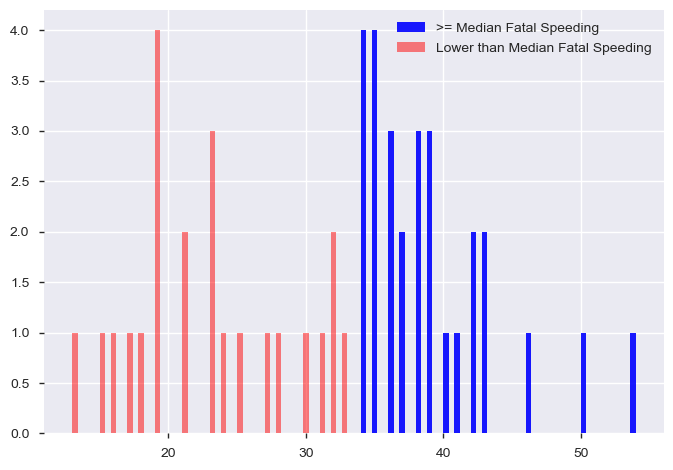

In [58]:
bins = 50
plt.hist(df_HighFatalSpeeding, bins, alpha=0.9, label='>= Median Fatal Speeding', color='blue')
plt.hist(df_LowFatalSpeeding, bins, alpha=0.5, label='Lower than Median Fatal Speeding', color='red')
plt.legend(loc='best')
plt.show()

In [59]:
# Alternatively,
pmf = df_HighFatalSpeeding.value_counts().sort_index() / len(df_HighFatalSpeeding)
pmf.head()

34    0.142857
35    0.142857
36    0.107143
37    0.071429
38    0.107143
Name: Fatal_Speeding, dtype: float64

In [60]:
pmf.sum()

0.9999999999999999

Since pmf is normalized, the sum of pmf, or total probability is = 1

In [61]:
# Using the thinkstats2 module for pmf of df_HighFatalSpeeding

thinkstats2.Pmf(df_HighFatalSpeeding)


Pmf({35: 0.14285714285714285, 34: 0.14285714285714285, 39: 0.10714285714285714, 38: 0.10714285714285714, 36: 0.10714285714285714, 43: 0.07142857142857142, 42: 0.07142857142857142, 37: 0.07142857142857142, 54: 0.03571428571428571, 50: 0.03571428571428571, 46: 0.03571428571428571, 41: 0.03571428571428571, 40: 0.03571428571428571})

### 4. Cumulative Distribution Function (CDF)

I am using the df.Fatal_BillionMiles (the numbers of drivers involved in fatal collisions per billion miles)  to show how the number of deaths for this variable of fatal collision is distributed across the data.

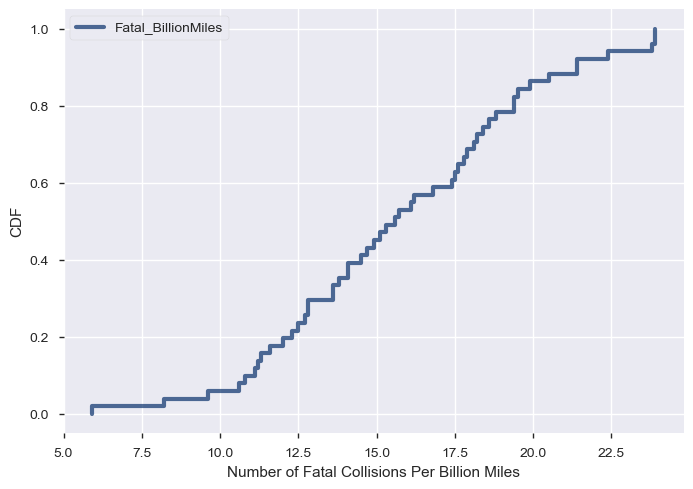

<Figure size 800x600 with 0 Axes>

In [62]:
cdf_BillionMiles = thinkstats2.Cdf(df.Fatal_BillionMiles, label = 'Fatal_BillionMiles')
thinkplot.Cdf(cdf_BillionMiles)
thinkplot.Show(xlabel='Number of Fatal Collisions Per Billion Miles', ylabel='CDF')

About 30% of fatal collisions will occur per billion miles, or about 13 collisions. For every billion miles, there will approximately be 16-18 collisions, or about 60%.  We can see fewer accidents per billion miles as the CDF gets lower. Common values appear as steep or vertical sections of the CDF and there are fewer values below 10 fatal collisions per billion milers, hence, the CDF in this range is almost flat. 

### 5. Analytical Distribution

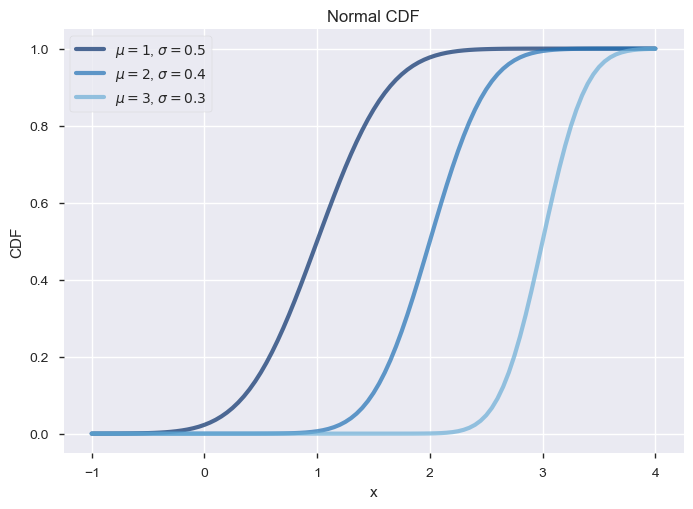

In [63]:
# Normal Distribution from ThinkStats2 

thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, 
                                               low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

Mean, Var 15.817021276595742 11.96907197827071
Sigma 3.459634659652766


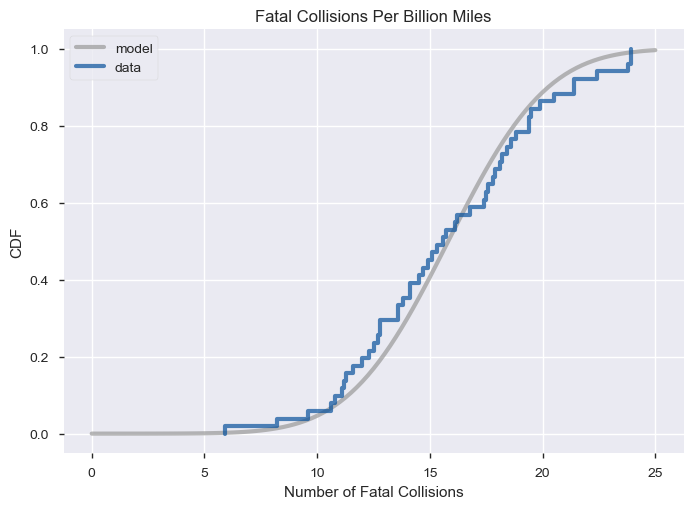

In [64]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df.Fatal_BillionMiles, p=0.05)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=25)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df.Fatal_BillionMiles, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Fatal Collisions Per Billion Miles',
                 xlabel='Number of Fatal Collisions',
                 ylabel='CDF')

The CDF shows us some useful information if we consider percentiles. It looks like around 15 fatal collisions per billion miles is the 60th percentile, and nearly 40% of every billion miles will result in more than 15 fatal collisions. Common range of fatal collisions appear as the steeper portion of our line with the mean to be around 16. Our visual representation doesn't show a clear mode. Our data is very close to the model near the mean but deviates at the ends, meaning there could be some outliers in our data. Overall, the model fits the data well. 

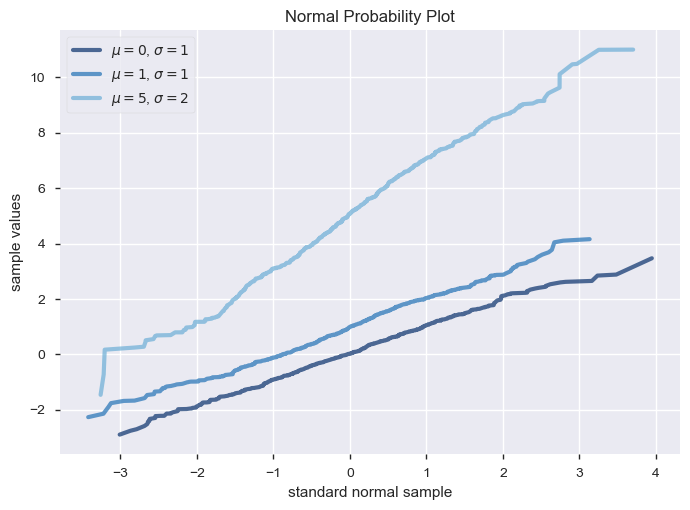

In [65]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n)
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal Probability Plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

This plot is showing normality. Our data shows that the plot is approximately straight if the data are in fact part of a normal distribution.In addition, we can see near the tails, there is a bit of deviation, suggesting that it could be due to outliers.   

### 6. Scatter Plot

#### 1. Examining the relationship between fatal collisions with alcohol impaired and fatal collisions with speeding

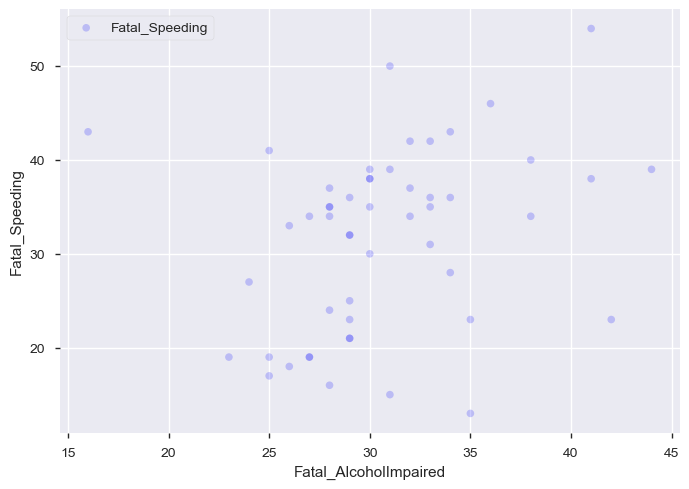

<Figure size 800x600 with 0 Axes>

In [66]:
thinkplot.Scatter(df.Fatal_AlcoholImpaired, df.Fatal_Speeding, label = "Fatal_Speeding")
thinkplot.Show(xlabel='Fatal_AlcoholImpaired', ylabel='Fatal_Speeding')

In [67]:
# Pearson's coeficient
pearsonr(df.Fatal_AlcoholImpaired, df.Fatal_Speeding)

(0.28624417148140197, 0.04171607722587956)

Based on the plot and the coefficient, it looks like Fatal_AlcoholImpaired and Fatal_Speeding have a weak positive correlation. As the number of fatal collisions driving while impaired with alcohol increases, the number of fatal collisions with speeding also increases. 

In [68]:
# Alternatively, another method to calculate Covariance and Pearson's Coefficient is: 

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [69]:
Covariance = Cov(df.Fatal_Speeding, df.Fatal_AlcoholImpaired)
print("Covariance =", Covariance)

Covariance = 13.874663590926566


In [70]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [71]:
Pearsons_Correlation = Corr(df.Fatal_Speeding, df.Fatal_AlcoholImpaired)
print("Pearson's Correlation = ", Pearsons_Correlation)

Pearson's Correlation =  0.286244171481402


#### 2. Examining the relationship between fatal collisions with  and fatal collisions with speeding

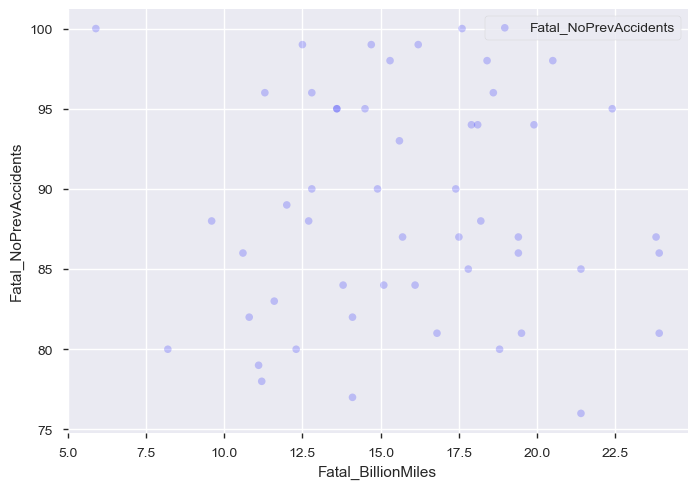

<Figure size 800x600 with 0 Axes>

In [72]:
thinkplot.Scatter(df.Fatal_BillionMiles, df.Fatal_NoPrevAccidents, label = "Fatal_NoPrevAccidents")
thinkplot.Show(xlabel='Fatal_BillionMiles', ylabel='Fatal_NoPrevAccidents')

In [73]:
# Pearson's coeficient
pearsonr(df.Fatal_BillionMiles, df.Fatal_NoPrevAccidents)

(-0.01794187687404364, 0.9005519652533772)

In [74]:
# Alternative Method to calculate Pearson's Coefficient and Covariance: 

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [75]:
Covariance = Cov(df.Fatal_BillionMiles, df.Fatal_NoPrevAccidents)
print("Covariance =", Covariance)

Covariance = -0.5046520569011921


In [76]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [77]:
Pearsons_Correlation = Corr(df.Fatal_BillionMiles, df.Fatal_NoPrevAccidents)
print("Pearson's Correlation = ", Pearsons_Correlation)

Pearson's Correlation =  -0.01794187687404368


For Fatal_BillionMiles and Fatal_NOPrevAccidents, based on the plot and the coefficient, it looks like these two variables have a very weak negative correlation. As the number of fatal collisions per billion miles increases, the number of fatal collisions of those who had no been involved in previous accidents decreases, and vice versa. However, the relationship of these two variables is very weak. 

### 7. Hypothesis Testing

#### Testing Correlation using Permutation Test

To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data.

In [78]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [79]:
data = df.Fatal_AlcoholImpaired, df.Fatal_Speeding

ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print("p-value =",pvalue)

p-value = 0.491


p-value > 0.05 indicates a failure to reject the null hypothesis at the 5% significance level suggesting that there is no significant difference between these two variables.

### 8. Regression Analysis

### Regression Analysis

#### 1. Regression Analysis of one dependent and one explanatory variable

In [80]:
x = df.Fatal_AlcoholImpaired 
y = df.Fatal_Speeding

formula = 'y~x'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.373
Date:                Wed, 26 Feb 2020   Prob (F-statistic):             0.0417
Time:                        20:42:18   Log-Likelihood:                -185.21
No. Observations:                  51   AIC:                             374.4
Df Residuals:                      49   BIC:                             378.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2379      7.992      1.907      0.062      -0.822      31.298
x              0.5373      0.257      2.091      0.042       0.021       1.054
==============================================================================
Omnibus:                        0.651   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.752
Skew:                          -0.145   Prob(JB):                        0.686
Kurtosis:                       2.481   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For this regression, we can see the change in mean response per unit increase in the number of fatal collisions when speeding when the other variable (Fatal_AlcoholImpaired) is held constant. 

#### 2. Regression Analysis of one dependent and multiple explanatory variables.

In [81]:
y = df.Fatal_BillionMiles #value we are predicting
x = df[['Fatal_NoPrevAccidents', 'Fatal_AlcoholImpaired', 'Fatal_Speeding', 'Fatal_NotDistracted']] #explanatory variables

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0) #split the data 80/20

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Fatal_NoPrevAccidents,-0.000403
Fatal_AlcoholImpaired,0.115664
Fatal_Speeding,-0.049427
Fatal_NotDistracted,0.013740


The regression coefficient is the constant that represents the rate of change of one variable, in this case it is (Fatal_BillionMiles) as a function of changes in the other variables (Fatal_NoPrevAccidents, Fatal_AlcoholImpaired, Fatal_Speeding, Fatal_NotDistracted). It is the slope of the regression line. Each coefficient estimates the change in the mean response per unit increase in the number of fatal collisions per billion miles when all other predictors are held constant.

### Thank you and this is the end of my code